In [137]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from matplotlib.gridspec import GridSpec
import datetime
import warnings
import tqdm
from metpy import calc
import string
from metpy.units import units

(c1,c2,c3,c4)=('#1b9e77','#d95f02','#7570b3','#e7298a')
warnings.simplefilter("ignore")
names = ['High Cloud','Low Cloud','Clear Sky']

# Import data

In [138]:
# met_dict = pickle.load(open('met_dict.p','rb'))
rawinsondes = pickle.load(open('../rawinsondes.p','rb'))

In [139]:
df = pickle.load(open('night_df.p','rb'))

df['hour'] = [d.time().hour for d in df['dt']]
df = df[df['hour']==9]

print(df.shape)

(10916, 30)


In [140]:
df = df[df['NP']=='22']
df

,day,stake_depth_anom,diff_anom,Air temperature_anom,Wind speed_anom,Latitude,Longitude,Air temperature,Relative humidity,Sea level pressure,...,diff,NP,stake_depth,year,month,dt,wind_height,Wind_corrected,wind_correction,hour
code,,,,,,,,,,,,,,,,,,,,,
1974-04-01 09:00:00_22,91.0,3.526924,-0.232558,2.193275,-0.661848,78.115,-178.130,-28.7,85.0,1021.8,...,1.3,22,38.0,1974,4,1974-04-01 09:00:00,10.0,4.0,0.0,9
1974-04-02 09:00:00_22,92.0,3.497518,-0.447148,1.833648,-2.600405,78.120,-178.178,-28.9,85.0,1023.2,...,1.1,22,38.0,1974,4,1974-04-02 09:00:00,10.0,2.0,0.0,9
1974-04-03 09:00:00_22,93.0,3.505524,-0.851506,3.244319,-2.585481,78.127,-178.316,-27.3,85.0,1022.3,...,0.7,22,38.0,1974,4,1974-04-03 09:00:00,10.0,2.0,0.0,9
1974-04-04 09:00:00_22,94.0,3.499590,-0.253323,3.687647,-0.572713,78.133,-178.454,-26.7,86.0,1019.9,...,1.3,22,38.0,1974,4,1974-04-04 09:00:00,10.0,4.0,0.0,9
1974-04-05 09:00:00_22,95.0,3.506637,0.126774,-0.135051,-0.541385,78.140,-178.592,-30.3,83.0,1027.0,...,1.7,22,38.0,1974,4,1974-04-05 09:00:00,10.0,4.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982-03-09 09:00:00_22,68.0,16.772617,-1.791698,5.559389,-0.974193,86.272,4.825,-27.6,74.0,1013.7,...,-0.6,22,50.0,1982,3,1982-03-09 09:00:00,10.0,4.0,0.0,9
1982-03-10 09:00:00_22,69.0,17.639190,-0.800993,9.495169,8.036795,86.302,4.011,-23.6,77.0,1010.7,...,0.4,22,51.0,1982,3,1982-03-10 09:00:00,10.0,13.0,0.0,9
1982-03-11 09:00:00_22,70.0,19.514352,-0.810791,11.403636,7.049948,86.334,2.991,-21.6,77.0,1013.1,...,0.4,22,53.0,1982,3,1982-03-11 09:00:00,10.0,12.0,0.0,9


In [141]:
list_of_dicts = []
bad_codes = []

for dt, NP, code in zip(df['dt'],df['NP'],df.index):
    
#     print(code)
    
    if (NP in rawinsondes.keys()) and (dt.date() in rawinsondes[NP].keys()):
#         print(code)
        rs_metadata = rawinsondes[NP][dt.date()]['metadata']
        rs_metadata['code'] = code
        list_of_dicts.append(rs_metadata)
            
    else:
        bad_codes.append(code)

df_meta = pd.DataFrame(list_of_dicts)

df_meta.set_index('code',inplace=True)

for code in tqdm.tqdm(bad_codes):
    df = df[df.index!=code]

df = pd.concat([df,df_meta],axis=1)

df

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 2524.93it/s]


,day,stake_depth_anom,diff_anom,Air temperature_anom,Wind speed_anom,Latitude,Longitude,Air temperature,Relative humidity,Sea level pressure,...,CLOUD_HEIGHT_QLTY,MID_CLOUD,MID_CLOUD_QLTY,HIGH_CLOUD,HIGH_CLOUD_QLTY,date,n_points,inversion_depth,inversion_temperature,precipitable_water
code,,,,,,,,,,,,,,,,,,,,,
1974-09-07 09:00:00_22,-115.0,NaN,-0.877563,2.523189,-2.061148,81.352,-171.153,-4.9,95.0,1021.1,...,-9,-9,-9,-9,-9,1974-09-07,26,720.0,5.0,9.685320
1974-09-09 09:00:00_22,-113.0,NaN,0.213117,6.239589,-5.061241,81.394,-170.992,-1.8,98.0,1022.2,...,-9,-9,-9,-9,-9,1974-09-09,14,1320.0,0.3,7.519732
1974-09-10 09:00:00_22,-112.0,NaN,1.921566,0.179854,-1.076138,81.407,-171.130,-8.1,92.0,1017.9,...,-9,-9,-9,-9,-9,1974-09-10,20,970.0,-1.3,8.341823
1974-09-11 09:00:00_22,-111.0,NaN,0.124773,0.607102,-0.110401,81.407,-171.592,-7.9,96.0,1023.3,...,-9,-9,-9,-9,-9,1974-09-11,20,160.0,-4.3,7.697615
1974-09-12 09:00:00_22,-110.0,NaN,1.136650,-7.144386,-2.095134,81.407,-171.792,-15.9,87.0,1024.8,...,-9,-9,-9,-9,-9,1974-09-12,21,380.0,-6.1,6.342224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982-02-24 09:00:00_22,55.0,15.300427,-0.175927,-0.761628,0.987403,86.788,9.982,-34.1,73.0,1025.4,...,0,9,0,9,0,1982-02-24,25,560.0,-20.3,1.889256
1982-02-25 09:00:00_22,56.0,15.174432,0.922777,-1.705870,-2.033919,86.740,9.266,-35.0,73.0,1024.4,...,0,9,0,9,0,1982-02-25,28,730.0,-20.7,1.935969
1982-02-26 09:00:00_22,57.0,15.059782,2.118370,-1.517177,-1.028035,86.708,8.807,-34.8,73.0,1022.2,...,0,9,0,9,0,1982-02-26,23,780.0,-22.7,1.781359


# Plot relationship between the temp-magnitude of the inversion aloft and the size of the surface inversion

In [142]:
df_cloudy_low = df[df['Low cloudiness']>9]
df_clear_total = df[df['Total cloudiness']<1]
df_clear_low = df[df['Low cloudiness']<1]
df_cloudy_high = df_clear_low[df_clear_low['Total cloudiness']>8]

In [143]:
print(np.nanmean(df_cloudy_low['inversion_temperature']))
print(np.nanmean(df_cloudy_high['inversion_temperature']))

-10.811808118081181
-16.891145833333336


(array([ 7., 17., 28., 59., 43., 37., 35., 31., 11.,  3.]),
 array([-26.  , -22.81, -19.62, -16.43, -13.24, -10.05,  -6.86,  -3.67,
         -0.48,   2.71,   5.9 ]),
 <BarContainer object of 10 artists>)

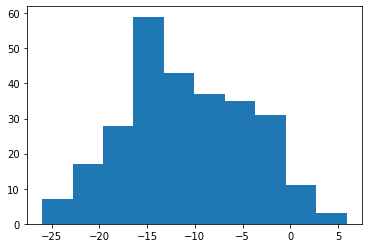

In [144]:
plt.hist(df_cloudy_low['inversion_temperature'])

(array([ 3.,  8., 36., 46., 35., 29., 16.,  9.,  8.,  2.]),
 array([-32.3 , -28.77, -25.24, -21.71, -18.18, -14.65, -11.12,  -7.59,
         -4.06,  -0.53,   3.  ]),
 <BarContainer object of 10 artists>)

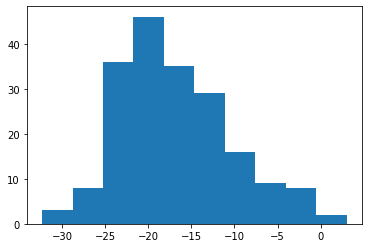

In [145]:
plt.hist(df_cloudy_high['inversion_temperature'])

In [146]:
def get_pw(m,bottom=None,top=None):

    temperature_metpy = np.array(m['temperature'])*units.degC
    humidity_metpy = np.array(m['humidity'])*units.percent
    dewpoint_metpy = calc.dewpoint_from_relative_humidity(temperature_metpy,humidity_metpy)
    pressure_metpy = np.array(m['pressure'])*units.hPa
    
    precipitable_water_metpy = calc.precipitable_water(pressure_metpy,dewpoint_metpy,bottom=bottom,top=top)
    
#     plt.plot(precipitable_water_metpy,m['altitude'])
    
    return precipitable_water_metpy

def get_esat_i(data):
    exp = np.exp((22.452*data['temperature'])/(272.55+data['temperature']))
    coeff = (1.0003+(4.18e-6*data['pressure']))*6.1115
    return exp*coeff

def get_esat_w(data):
    exp = np.exp((17.966*data['temperature'])/(247.15+data['temperature']))
    coeff = (1.0007+(3.46e-6*data['pressure']))*6.1121
    return exp*coeff

def get_rhi(data):
    ei = get_esat_i(data)
    ew = get_esat_w(data)
    rhi = ew*data['humidity']/ei
    return rhi
    
def interp(df, new_index):
    """Return a new DataFrame with all columns values interpolated
    to the new_index values."""
    
#     try:
#         df.set_index('altitude')
#     except:
#         pass
    
    df_out = pd.DataFrame(index=new_index)
    df_out.index.name = df.index.name

    for colname, col in df.iteritems():
        df_out[colname] = np.interp(new_index, df.index, col)

    return df_out

In [147]:
weather_vars = ['temperature','humidity','dewpoint','rh_i']

x = {'altitude':{}, 
     'pw_high':{},
     'pw_low':{},
     'pw_tot':{},
     'rhi_high_max':{},
     'rhi_low_max':{},
     'rhi_tot_mean':{},
         'code':{},
         'diff':{}}

a, b = 0, 0

for var in weather_vars:
    x[var] = {}

for d,name in zip([df_cloudy_high,df_cloudy_low,df_clear_total],names):
    
    print(name)
    
    for key in x.keys():
        x[key][name] = []
        
    
    
    for i in tqdm.tqdm(d.index):

        if d.loc[i]['n_points'] > 10:
            if d.loc[i]['min_altitude'] < 50:
                if d.loc[i]['max_altitude'] > 8000:


                    NP = d.loc[i]['NP']

                    data =  rawinsondes[NP][df['date'].loc[i]]['data']


                    pw = rawinsondes[NP][df['date'].loc[i]]['metadata']['precipitable_water']

                    data = data[data['humidity']<100]
                    data = data[data['humidity']>0]
                    data = data[data['altitude']>=0]
                    
                    max_2000 = np.nanmax(data['temperature'][data['altitude']>2000])
                    min_2000 = np.nanmin(data['temperature'][data['altitude']<2000])
                    
#                     print(max_2000,min_2000)
#                     plt.plot(data['temperature'],data['altitude'],marker='o')
#                     plt.axhline(2000)
#                     plt.ylim(0,3000)
#                     plt.show()
                    
                    if max_2000>min_2000:
                        # Then the coldest temperature above 2000m is warmer than the warmest temp below 2000m
                        a+=1
                    b+=1
                    
                    data['rh_i'] = get_rhi(data)
                    
                    d_ = data.copy()
                    
                    d_.set_index('altitude',inplace=True)

                    data = interp(d_,np.arange(np.min(data['altitude']),8_000,10))
                    

                    x['code'][name].append(i)

                    x['pw_low'][name].append(get_pw(data,top=780*units.hPa).magnitude)
                    x['pw_tot'][name].append(get_pw(data).magnitude)
                    x['pw_high'][name].append(get_pw(data,bottom=780*units.hPa).magnitude)

                    x['rhi_low_max'][name].append(np.nanmax(data['rh_i'][data.index<2000]))
                    x['rhi_tot_mean'][name].append(np.nanmean(data['rh_i']))
                    x['rhi_high_max'][name].append(np.nanmax(data['rh_i'][(data.index>2000)]))

                    x['diff'][name].append(d.loc[i]['diff'])


                    for var in weather_vars:
                        x[var][name]+=list(data[var])
                    x['altitude'][name]+=list(data.index)

High Cloud


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 203/203 [00:07<00:00, 25.59it/s]


Low Cloud


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 323/323 [00:12<00:00, 26.41it/s]


Clear Sky


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 453/453 [00:16<00:00, 27.89it/s]


In [134]:
hcpwtot = x['pw_tot']['High Cloud']
lcpwtot = x['pw_tot']['Low Cloud']
cspwtot = x['pw_tot']['Clear Sky']
print('PW Totals for high and low cloud')
print(np.nanmean(hcpwtot),np.nanmean(lcpwtot),np.nanmean(cspwtot))
print(np.nanmean(hcpwtot)/np.nanmean(lcpwtot))
print(len(hcpwtot),len(lcpwtot))
print()
hcpwtot = x['pw_high']['High Cloud']
lcpwtot = x['pw_high']['Low Cloud']
print('PW >2000 for high and low cloud')
print(np.nanmean(hcpwtot),np.nanmean(lcpwtot))
print(np.nanmean(hcpwtot)/np.nanmean(lcpwtot))
print(len(hcpwtot),len(lcpwtot))

PW Totals for high and low cloud
3.320038653549405 4.893020832965443 2.4144583925595366
0.6785253459747231
144 202

PW >2000 for high and low cloud
1.5795707180312404 2.091203481676784
0.7553405165358168
144 202


120.57928595068284 111.44221939507418 106.04104276498394
0.7326732673267327 148 202
0.9166666666666666 132 144


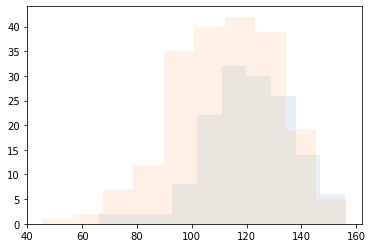

(array([ 5., 18., 27., 40., 45., 29., 17., 14.,  5.,  2.]),
 array([ 93.98019822,  96.43172496,  98.8832517 , 101.33477844,
        103.78630518, 106.23783192, 108.68935866, 111.1408854 ,
        113.59241214, 116.04393888, 118.49546562]),
 <BarContainer object of 10 artists>)

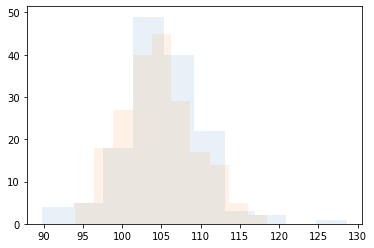

In [136]:
hcpwtot = np.array(x['rhi_high_max']['High Cloud'])
lcpwtot = np.array(x['rhi_high_max']['Low Cloud'])
cspwtot = np.array(x['rhi_high_max']['Clear Sky'])

plt.hist(hcpwtot,alpha=0.1)
plt.hist(lcpwtot,alpha=0.1)

print(np.nanmean(hcpwtot),np.nanmean(lcpwtot),np.nanmean(cspwtot))

print(len(lcpwtot[lcpwtot>100])/len(lcpwtot),len(lcpwtot[lcpwtot>100]),len(lcpwtot))
print(len(hcpwtot[hcpwtot>100])/len(hcpwtot),len(hcpwtot[hcpwtot>100]),len(hcpwtot))

plt.show()

hcpwtot = x['rhi_low_max']['High Cloud']
lcpwtot = x['rhi_low_max']['Low Cloud']

plt.hist(hcpwtot,alpha=0.1)
plt.hist(lcpwtot,alpha=0.1)

In [102]:
for name in names:

    dic = {}

    for var in ['pw_low','pw_high']:

        code, pw = x['code'][name],x[var][name]

        valid = df.loc[code].copy()

        valid['pw_clean'] = pw
        valid = valid[valid['min_altitude']<100]
        valid = valid[valid['max_altitude']>10_000]

        valid = valid.dropna()

        dic[var] = valid['pw_clean']
        
    pwcorr = pd.concat([dic['pw_low'],dic['pw_high']],axis=1)
    pwcorr.columns = {'pw_low','pw_high'}
    
    pwcorr.dropna(inplace=True)
    lr = linregress(pwcorr['pw_low'],pwcorr['pw_high'])

In [103]:
pwcorr

,pw_low,pw_high
code,,
1974-10-16 09:00:00_22,2.844769,1.850114
1974-10-30 09:00:00_22,2.510190,1.614510
1974-11-03 09:00:00_22,1.346818,0.763162
1974-11-04 09:00:00_22,2.650891,1.586658
1974-11-07 09:00:00_22,0.857835,0.970635
...,...,...
1982-01-07 09:00:00_22,0.891063,0.784469
1982-01-08 09:00:00_22,0.955963,0.869213
1982-01-18 09:00:00_22,0.723840,0.764719


In [99]:
dd = {} # data_dict

for var in ['pw_tot','pw_low','pw_high','rhi_low','rhi_high','rhi_tot']:
    print(var)
    
    dd[var] = {n:{} for n in names}

    big_ones = []

    for name in names:

        code, pw = x['code'][name],x[var][name]

        valid = df.loc[code].copy()

        valid['code'] = code
        valid['pw_clean'] = pw
        valid = valid[valid['min_altitude']<100]
        valid = valid[valid['max_altitude']>10_000]
        valid = valid[valid['Wind speed']<2.5]
    #     valid = valid[valid['pw_clean']<20]
#         print(valid.shape)

        if name == 'cloudy':
            big_ones+=list(valid[valid['pw_clean']>7].index)

        valid = valid.dropna()
        
        dd[var][name]['pw_clean'] = valid['pw_clean']
        dd[var][name]['diff'] = valid['diff']

pw_tot


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [72]:
df_inv = df[df['inversion_depth']<5000]

df_inv = df_inv[~np.isnan(df_inv['inversion_depth'])]

df_inv['it_diff'] = df_inv['inversion_temperature']-df_inv['Surface temperature']

df_cloudy_low = df_inv[df_inv['Low cloudiness']>9]
df_clear_total = df_inv[df_inv['Total cloudiness']<1]
df_clear_low = df_inv[df_inv['Low cloudiness']<1]
df_cloudy_high = df_clear_low[df_clear_low['Total cloudiness']>8]

(array([ 9., 31., 40., 58., 24., 15.,  7.,  5.,  2.,  1.]),
 array([-1.1 , -0.53,  0.04,  0.61,  1.18,  1.75,  2.32,  2.89,  3.46,
         4.03,  4.6 ]),
 <BarContainer object of 10 artists>)

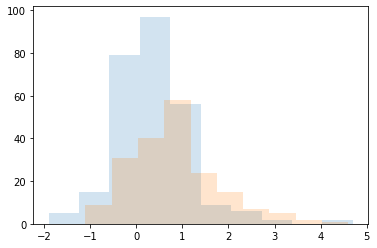

In [73]:
plt.hist(df_cloudy_low['diff'],alpha=0.2)
plt.hist(df_cloudy_high['diff'],alpha=0.2)

In [74]:
from matplotlib import colors

def density(xdata,ydata,ax,xbins,ybins):
    
    density, _, _ = np.histogram2d(xdata,ydata,[ybins,xbins])
    
    imsh = ax.imshow(density,cmap='Greys',norm=colors.LogNorm(vmin=1,vmax=10**3),
                     extent=[xbins[0],xbins[-1],ybins[-1],ybins[0]],
                    aspect='auto')
    
    return imsh

High Cloud 192
931.4947916666666
LinregressResult(slope=-0.2442116691866232, intercept=933.9825708529277, rvalue=-0.0020942527877266144, pvalue=0.9770006878745606, stderr=8.459789501464313, intercept_stderr=95.73283460258294)
Low Cloud 271
793.2656826568266
LinregressResult(slope=32.253984756796285, intercept=592.1245969041117, rvalue=0.3368501477044861, pvalue=1.2953578427086255e-08, stderr=5.49689823718537, intercept_stderr=43.18208922312585)
Clear Sky 423
972.5862884160756
LinregressResult(slope=26.6743332340842, intercept=543.6592264186352, rvalue=0.2068218064006964, pvalue=1.8065096548310346e-05, stderr=6.149830625648794, intercept_stderr=101.84385404053917)


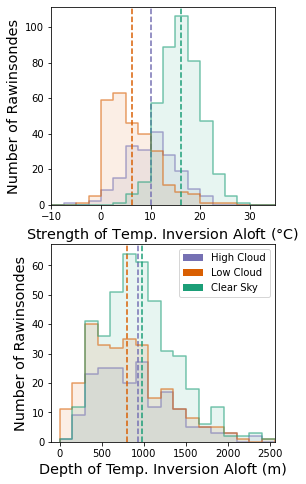

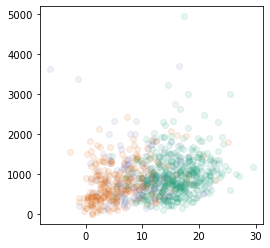

In [75]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(4,8))

fig2, ax = plt.subplots(1,1,figsize=(4,4))

mycolors = [c3,c2,c1]
tbw = 2.5
hbw = 150

temp_bins = np.arange(-20,40,tbw)
height_bins = np.arange(0,2751,hbw)

for dfc_,name,c in zip([df_cloudy_high,df_cloudy_low,df_clear_total],
                        names,mycolors):
    
    print(name,dfc_.shape[0])
    
    pt,xt = np.histogram(dfc_['it_diff'],bins=temp_bins)
    ph,xh = np.histogram(dfc_['inversion_depth'],bins=height_bins)
    
    print(np.nanmean(dfc_['inversion_depth']))
    
    ax1.bar(xt[:-1]+(tbw/2),pt,alpha=0.1,width=tbw,color=c)
    
    ax2.bar(xh[:-1]+(hbw/2),ph,alpha=0.1,width=hbw,color=c)
    
    
    ax1.step([-20]+list(xt[:-1]),[0]+list(pt),alpha=0.6,where='post',color=c)
    ax2.step([0]+list(xh[:-1]),[0]+list(ph),alpha=0.6,where='post',color=c)
    
    ax2.bar([0],[0],color=c,label=name)
    
    ax1.axvline(np.nanmean(dfc_['it_diff']),ls='--',color=c)
    
    ax2.axvline(np.nanmean(dfc_['inversion_depth']),ls='--',color=c)
    
    ax.scatter(dfc_['it_diff'],dfc_['inversion_depth'],color=c,alpha=0.1)
    lr = linregress(dfc_['it_diff'],dfc_['inversion_depth'])
    print(lr)
    
for ax in [ax1,ax2]:
    ax.set_ylabel('Number of Rawinsondes',fontsize='x-large')
    
ax1.set_xlabel('Strength of Temp. Inversion Aloft ($\degree$C)',fontsize='x-large')
ax2.set_xlabel('Depth of Temp. Inversion Aloft (m)',fontsize='x-large')
    
ax1.set_xlim(-10,35)

ax2.legend()
    
ax2.set_xlim(-100,2550)

plt.subplots_adjust(hspace=0.3)



In [76]:
df_cloudy_high['inversion_depth'][df_cloudy_high['inversion_depth']<2000].shape[0], df_cloudy_high['inversion_depth'].shape[0]

(183, 192)

7.113556602554745e-110
3.1231210268755036e-09
0.007584998488815205
2.738971558203386e-12


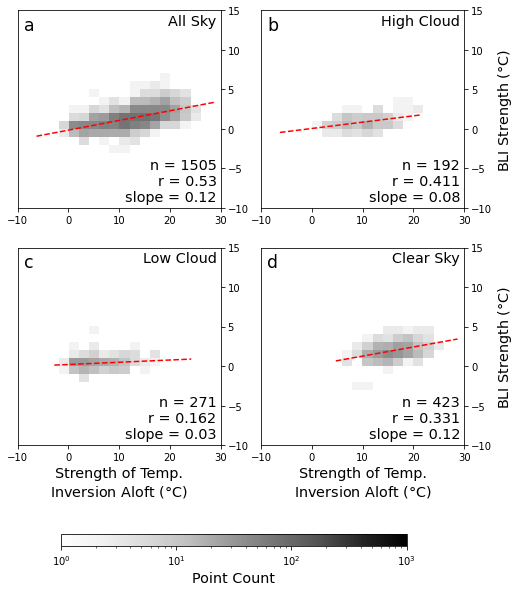

In [77]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

for dfc_,name,ax in zip([df_inv,df_cloudy_high,df_cloudy_low,df_clear_total],
                        ['All Sky']+names,
                        axs.reshape(-1)):
    
    
    lr=linregress(dfc_['it_diff'],dfc_['diff'])
    if lr[3]<0.05:
        x=np.arange(np.min(dfc_['it_diff']),np.max(dfc_['it_diff']),1)
        y = x*lr[0]+lr[1]
        ax.plot(x,y,color='r',ls='--')
        
        print(lr[3])
        
        s = f'n = {dfc_.shape[0]}\nr = {np.round(lr[2],3)}\nslope = {np.round(lr[0],2)}'
        ax.annotate(s,
         xycoords='axes fraction',
         xy=(0.98,0.02),
         va='bottom',
         ha='right',
         fontsize='x-large')


    imshow = density(dfc_['diff'],dfc_['it_diff'],ax,np.arange(-10,40,2),np.arange(-10,15,1))
    
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    
    ax.annotate(name,
         xycoords='axes fraction',
         xy=(0.98,0.98),
         va='top',
         ha='right',
         fontsize='x-large')
    
    ax.set_xlim(-10,30)
    
    ax.set_ylim(-10,15)
    
ax1,ax2,ax3,ax4 = axs.reshape(-1)

for ax in [ax3,ax4]:
    ax.set_xlabel('Strength of Temp.\nInversion Aloft ($\degree$C)',fontsize='x-large')


for ax in [ax2,ax4]:
    ax.set_ylabel('BLI Strength ($\degree$C)',fontsize='x-large')
    
position=fig.add_axes([0.2,-0.05,0.6,0.02])  ## the parameters are the specified position you set 
cb = plt.colorbar(imshow,cax=position,orientation='horizontal')
cb.set_label('Point Count',fontsize='x-large')

for ax,letter in zip(axs.reshape(-1),string.ascii_letters):
    
    ax.annotate(f'{letter}',
                xycoords='axes fraction',
                xy=(0.03,0.97),
                va='top',
                fontsize='xx-large')

# fig.subplots_adjust(hspace=1.2,wspace=0.1)

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/main_figs/rsonde_aloft.png',dpi=400,bbox_inches='tight')

# plt.show()

In [100]:
x.keys()

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [78]:
np.nanmean(dd['pw_tot']['High Cloud']['pw_clean']), np.nanmean(dd['pw_tot']['Low Cloud']['pw_clean']), np.nanmean(dd['pw_tot']['Clear Sky']['pw_clean'])


(2.9093071479085344, 4.443985740994259, 2.299781881410813)

In [95]:
len(dd['pw_tot']['High Cloud']['pw_clean']), len(dd['pw_tot']['Low Cloud']['pw_clean']), np.nanmean(dd['pw_tot']['Clear Sky']['pw_clean'])


(20, 25, 2.299781881410813)

In [90]:
np.nanmean(dd['pw_tot']['High Cloud']['pw_clean']) / np.nanmean(dd['pw_tot']['Low Cloud']['pw_clean'])

0.6546616747824288

In [87]:
np.nanmean(dd['pw_low']['High Cloud']['pw_clean']), np.nanmean(dd['pw_low']['Low Cloud']['pw_clean'])


(1.4878221610062383, 2.548519933728091)

In [88]:
np.nanmean(dd['pw_high']['High Cloud']['pw_clean']), np.nanmean(dd['pw_high']['Low Cloud']['pw_clean'])

(1.4214849768290712, 1.8954657975084046)

(array([8., 5., 3., 1., 0., 0., 1., 0., 1., 1.]),
 array([1.54723337, 2.12629266, 2.70535195, 3.28441123, 3.86347052,
        4.4425298 , 5.02158909, 5.60064838, 6.17970766, 6.75876695,
        7.33782624]),
 <BarContainer object of 10 artists>)

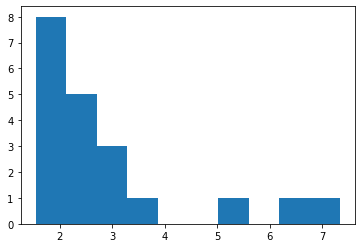

In [93]:
plt.hist(dd['pw_tot']['High Cloud']['pw_clean'])

(array([5., 3., 6., 1., 2., 3., 2., 1., 1., 1.]),
 array([1.67716057, 2.45010996, 3.22305934, 3.99600872, 4.7689581 ,
        5.54190749, 6.31485687, 7.08780625, 7.86075564, 8.63370502,
        9.4066544 ]),
 <BarContainer object of 10 artists>)

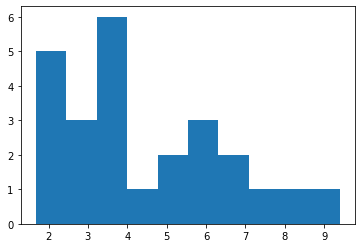

In [94]:
plt.hist(dd['pw_tot']['Low Cloud']['pw_clean'])

In [63]:
# np.nanmean(dd['pw_tot']['High Cloud']['pw_clean']), np.nanmean(dd['pw']['Low Cloud']['pw_clean'])


(1.4214849768290712, 1.1114939464804972)

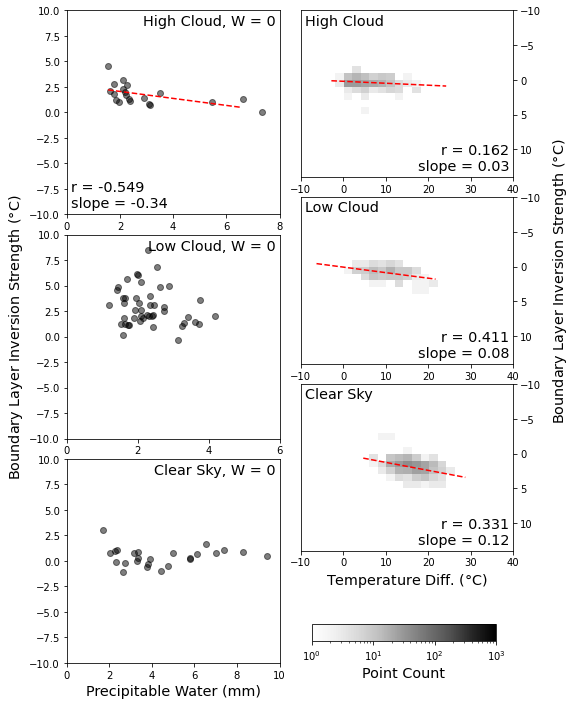

In [15]:
var = 'pw_tot'

fig = plt.figure(constrained_layout=True,figsize=(8,12))

gs = GridSpec(18, 2, figure=fig)

ax1 = fig.add_subplot(gs[0:6,0])
ax2 = fig.add_subplot(gs[6:12,0])
ax3 = fig.add_subplot(gs[12:18,0])

ax4 = fig.add_subplot(gs[0:5,1])
ax5 = fig.add_subplot(gs[5:10,1])
ax6 = fig.add_subplot(gs[10:15,1])



for name,ax in zip(names,[ax1,ax2,ax3]):

    ax.scatter(dd[var][name]['pw_clean'],dd[var][name]['diff'],color='k',alpha=0.5)
    
    lr=linregress(dd[var][name]['pw_clean'],dd[var][name]['diff'])
    if lr[3]<0.05:
        x=np.arange(np.min(dd[var][name]['pw_clean']),np.max(dd[var][name]['pw_clean']),1)
        y = x*lr[0]+lr[1]
        ax.plot(x,y,color='r',ls='--')

        s = f'r = {np.round(lr[2],3)}\nslope = {np.round(lr[0],2)}'    
        ax.annotate(s,
             xycoords='axes fraction',
             xy=(0.02,0.02),
             va='bottom',
             fontsize='x-large')
        
    ax.annotate(f'{name}, W = 0',
         xycoords='axes fraction',
         xy=(0.98,0.98),
         va='top',
         ha='right',
         fontsize='x-large')
    
    ax.set_ylim(-10,10)
    
    

    ax.set_xticks(np.arange(0,np.max(dd[var][name]['pw_clean'])+2,2))


for dfc_,name,ax in zip([df_cloudy_low,df_cloudy_high,df_clear_total],
                        names,
                        [ax4,ax5,ax6]):
    
    
    lr=linregress(dfc_['it_diff'],dfc_['diff'])
    if lr[3]<0.05:
        x=np.arange(np.min(dfc_['it_diff']),np.max(dfc_['it_diff']),1)
        y = x*lr[0]+lr[1]
        ax.plot(x,y,color='r',ls='--')
        
        s = f'r = {np.round(lr[2],3)}\nslope = {np.round(lr[0],2)}'
        ax.annotate(s,
         xycoords='axes fraction',
         xy=(0.98,0.02),
         va='bottom',
         ha='right',
         fontsize='x-large')


    imshow = density(dfc_['diff'],dfc_['it_diff'],ax,np.arange(-10,40,2),np.arange(-10,15,1))
    
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    
    ax.annotate(name,
         xycoords='axes fraction',
         xy=(0.02,0.98),
         va='top',
         fontsize='x-large')
    
    ax.set_xlim(-10,40)
    
ax3.set_xlabel('Precipitable Water (mm)',fontsize='x-large')
ax6.set_xlabel('Temperature Diff. ($\degree$C)',fontsize='x-large')

ax2.set_ylabel('Boundary Layer Inversion Strength ($\degree$C)',fontsize='x-large')

ax5.set_ylabel('Boundary Layer Inversion Strength ($\degree$C)',fontsize='x-large',labelpad=10)

position=fig.add_axes([0.55,0.15,0.32,0.02])  ## the parameters are the specified position you set 
cb = plt.colorbar(imshow,cax=position,orientation='horizontal')
cb.set_label('Point Count',fontsize='x-large')

fig.subplots_adjust(hspace=1.2,wspace=0.1)

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/rawinsonde.png',dpi=400,bbox_inches='tight')

plt.show()

In [44]:
#     x=np.arange(int(np.min(dfc_['diff']),int(np.max(dfc_['diff']))))
np.min(dfc_['diff'])
np.min(dfc_['diff
            '])

-9.8

(1396, 53)


LinregressResult(slope=-0.6039678143313837, intercept=-13.528263929298241, rvalue=-0.11373443498511537, pvalue=2.0489348776890378e-05, stderr=0.1413068436610539, intercept_stderr=0.1927654488974023)

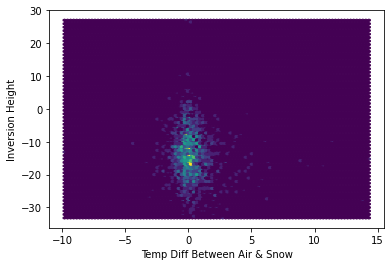

In [38]:
# df_clear_inv = df_inv[df_inv['Total cloudiness']<1]

plt.hexbin(df_clear_inv['diff'],df_clear_inv['inversion_temperature'])
# plt.xlim(-5,5)
# plt.ylim(0,2000)
plt.xlabel('Temp Diff Between Air & Snow')
plt.ylabel('Inversion Height')
# plt.ylim(-0.05,0.05)
print(df_clear_inv.shape)


# Plot relationship between the steepness of the inversion aloft and the surface inversion

In [ ]:
clean_grads = df_clear_inv[np.isfinite(df_clear_inv['inv_gradient'])]

clean_grads = clean_grads[clean_grads['inv_gradient']>0]

plt.scatter(clean_grads['inv_gradient'],clean_grads['diff'])

plt.xlabel('Temp Diff')

plt.ylabel('Inversion Gradient\n(degrees C per metre)')

plt.xlim(0,0.1)

linregress(clean_grads['inv_gradient'],clean_grads['diff'])

# Plot the relationship between the clear-sky inversions height and the surface temperature difference

In [ ]:
df_inv = df[df['inv_h']<5000]
df_inv = df_inv[~np.isnan(df_inv['inv_h'])]
df_clear_inv = df_inv[df_inv['Low cloudiness']<1]

plt.hexbin(df_clear_inv['diff'],df_clear_inv['inv_h'])
plt.xlim(-5,5)
plt.ylim(0,2000)
plt.xlabel('Temp Diff Between Air & Snow')
plt.ylabel('Inversion Height')

print(df_clear_inv.shape)

linregress(df_clear_inv['diff'],df_clear_inv['inv_h'])

# Same plot as above but for all sky conditions

In [ ]:
df_inv = df[df['inv_h']<5000]
df_inv = df_inv[~np.isnan(df_inv['inv_h'])]
df_clear_inv = df_inv[df_inv['Low cloudiness']>9]

plt.hexbin(df_clear_inv['diff'],df_clear_inv['inv_h'])
plt.xlim(-5,5)
plt.ylim(0,2000)
plt.xlabel('Temp Diff Between Air & Snow')
plt.ylabel('Inversion Height')

print(df_clear_inv.shape)

In [ ]:
plt.hexbin(df['doy'],df['diff'])
plt.ylabel('AT-SST (deg C)')
plt.xlabel('Days after Jan 1st')
plt.axhline(0,color='r')
plt.ylim(-5,5)
plt.show()